# Data visualistation with matplotlib


## 1. Import matplotlib modules

In [2]:
import matplotlib

Matplotlib has many different backends, usually its fine to stick to the default. But sometimes it is necessary to change the backend (before importing the plotting module ```pyplot```). The full list of available backends reads:

[u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']

In [3]:
matplotlib.use('MacOSX')

When working from within a jupyter notebook, we can choose *matplotlib* backend with a magic function

In [4]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [5]:
%matplotlib inline
#% matplotlib notebook

Now, we import ```pyplot``` the main plotting module of *matplotlib*

In [6]:
import matplotlib.pyplot as plt

## 2. The default plot

Let's create some data (normal distribution)

In [7]:
import numpy as np
data = np.random.normal(loc=5., scale=2., size=(10000,))

and plot a simple histogram of our data

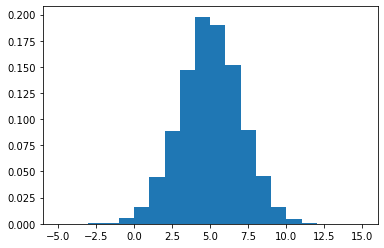

In [16]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
plt.show()

## 3. Adding more to the plot

First, we are going to fit a Gaussian profile to our function

In [13]:
from scipy.stats import norm
mu,sigma = norm.fit(data)

and plot it on top of our histogram

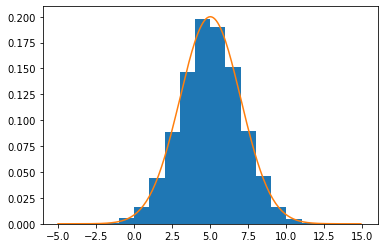

In [17]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma))
plt.show()

let's make a bit easier to read (colors, legends, axis lables, etc..)

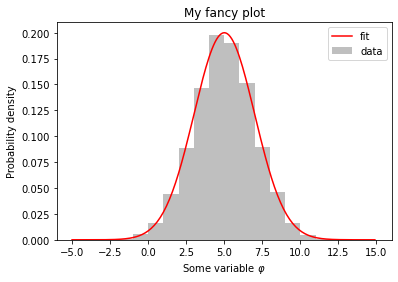

In [18]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.set_ylabel(r'Probability density')
ax.legend(loc=1)
plt.show()

## 4. More changes to the plot

Our plot looks already quite good, but some of the features don't give any extra information so why not removing them

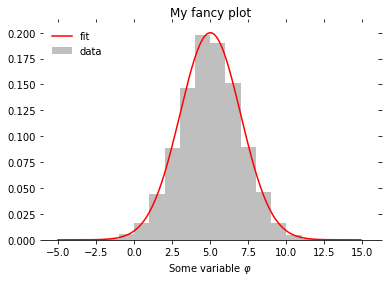

In [20]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
plt.show()

## 5. Saving the plot as a PDF

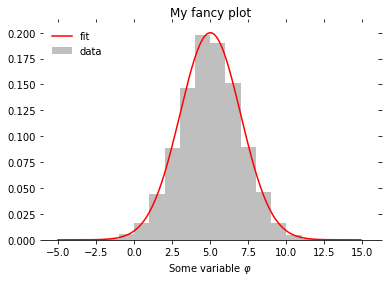

In [21]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
fig.savefig('my_fancy_plot.pdf', format='pdf', bbox_inches='tight')

## 6. My own plot

Let me begin by generating some dummy signal and background data.

In [9]:
signal = np.random.normal(loc=958., scale=2., size=(10000,))
background = np.random.uniform(950.,970., size=(100000,) )

<Figure size 432x288 with 0 Axes>

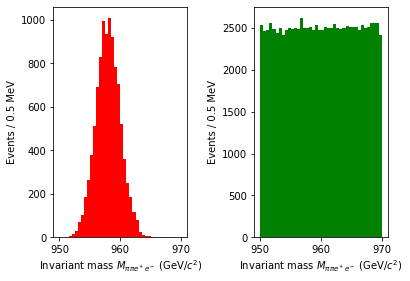

In [10]:
fig = plt.figure()
fig, [ax_sig, ax_bg] = plt.subplots(nrows=1, ncols=2)
#ax_sig  = fig.add_subplot(221)
#ax_bg  = fig.add_subplot(222)
#fig.tight_layout()
plt.subplots_adjust(left=0.125,right=0.9,bottom=0.1, top=0.9,wspace=0.5,hspace=0.2)


ax_sig.hist(signal,range=(950,970), bins=40, label="signal", color ='r')
ax_bg.hist(background,range=(950,970), bins=40, label="BG", color ='g')
ax_sig.set_xlabel("Invariant mass $M_{\pi\pi e^+e^-}$ (GeV/$c^2$)")
ax_bg.set_xlabel("Invariant mass $M_{\pi\pi e^+e^-}$ (GeV/$c^2$)")
ax_sig.set_ylabel("Events / 0.5 MeV")
ax_bg.set_ylabel("Events / 0.5 MeV")
plt.show()

fig.savefig('VTs_unfancy_plots.pdf', format='pdf', bbox_inches='tight')


Now let's make it look a bit nicer by stacking the histograms and beautifying a bit.

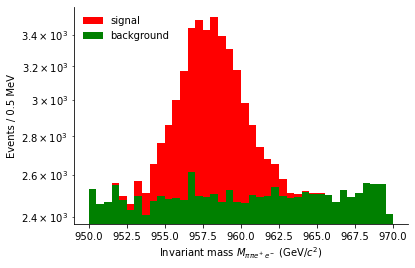

In [11]:
fig = plt.figure()
ax_stack  = fig.add_subplot(111)
ax_stack.hist([background, signal],range=(950,970), bins=40, label=["background", "signal"], color =['g','r'], histtype='stepfilled', stacked =True)
ax_stack.set_xlabel("Invariant mass $M_{\pi\pi e^+e^-}$ (GeV/$c^2$)")
ax_stack.set_ylabel("Events / 0.5 MeV")
ax_stack.set_yscale("log")
ax_stack.legend(loc=2, frameon=False)
ax_stack.spines['top'].set_visible(False)
ax_stack.spines['right'].set_visible(False)
plt.show()
fig.savefig('VTs_fancy_plot.pdf', format='pdf', bbox_inches='tight')